# Functions 
### This file contains the code challenges for Mike X Cohen's course on Calculus 1 using python. These challenges are specifically from the Functions section 
#### While the challenges are laid out in the course, the solutions are all my own.
#### The course link can be found here https://www.udemy.com/course/pycalc1_x/?couponCode=202212

In [1]:
import numpy as np 
import sympy as sym
import sympy.plotting.plot as symplot 
import matplotlib.pyplot as plt
import random 

## Code Challenge 1
### Working with the following function: y = x^2 + 3x^3 - x^4
#### Exercise 1: Implementing the function using numpy and producing a graph 
#### Exercise 2: Implementing the function using sympy 
#### Exercise 3: Converting a sympy object to be used by numpy 

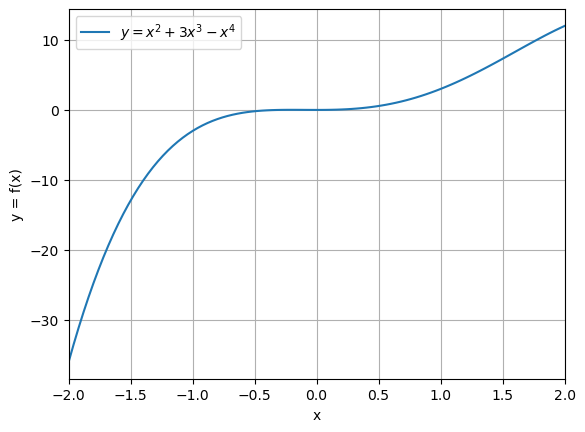

In [2]:
""" 
Exercise 1: Implement the function in numpy and produce a graph. Domain = -2,+2
"""

# Define domain for x 
x = np.linspace(-2,2,101)

# assign the function to y 
y = x**2 + 3*x**3 - x**4

# Plot the graph 
plt.plot(x,y, label = '$y = x^2 + 3x^3 - x^4$')
plt.legend()
plt.xlim(-2,2)
plt.xlabel('x')
plt.ylabel('y = f(x)')
plt.grid()
plt.show()

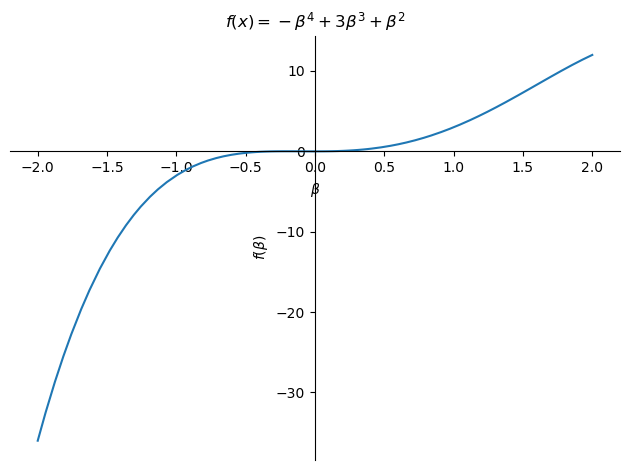

In [3]:
"""
Exercise 2: Implementing the above function using sympy 
"""

# Create a symbols object 
beta = sym.symbols('beta') 

function = beta**2 + 3*beta**3 - beta**4

p = symplot(function,(beta,-2,2),title=f'$f(x) = {sym.latex(function)}$',show=False)
p.show()

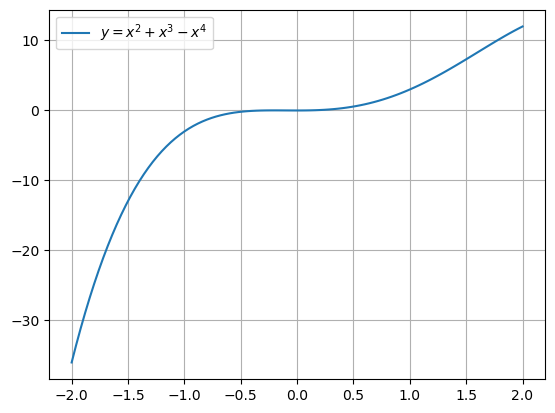

In [4]:
"""
Exercise 3: Convert from sympy into numpy 
"""

fx = sym.lambdify(beta,function) # Create a lamda function from the sympy objects 


# using the same domain for x that was used in exercise 1 
x = np.linspace(-2,2,101)
y = fx(x)

plt.plot(x,y,label = '$y=x^2+x^3-x^4$')
plt.grid()
plt.legend()
plt.show()



## Code Challenge 2 - Polynomials 
#### Exercise 1: Random polynomials with numpy 
#### Exercise 2: Plotting polynomials with sympy 
#### Exercise 3: Estimating a sin wave using addition of polynomials


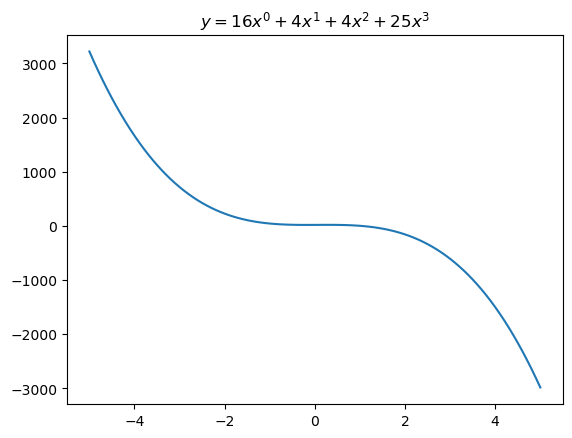

In [5]:
"""
Exercise 1: Creating random polynomials in numpy and plotting them. 
I will be working with third order polynomials with a y intercept, i.e., 4 coefficients, 4 exponents
"""

# Create four random numbers in a list to use as the coefficients 
coefs = [] 
for i in range(4):
    i = random.randint(0,30)
    coefs.append(i) 
    
# Create the domain for x 
x = np.linspace(-5,5,101)

# Create the function 
y = coefs[0]*x**0 + coefs[1]*x**1 + coefs[2]*x**2 -coefs[3]*x**3

# Plot 
plt.plot(x,y)
plt.title(f'$y = {coefs[0]}x^0 + {coefs[1]}x^1 + {coefs[2]}x^2 +{coefs[3]}x^3 $')
plt.show()

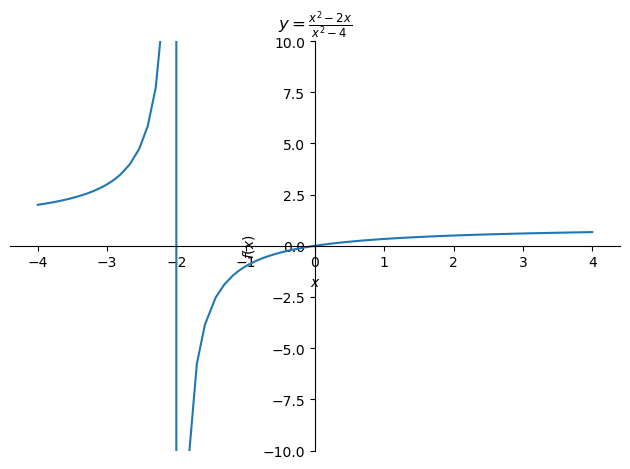

In [6]:
"""
Exercise 2: Plotting polynomials with sympy.
Create a rational function, plot it with sympy. 
"""

# Create a symbols object 
x = sym.symbols('x')


# Create a function 
y = (x**2 - 2*x) / (x**2 - 4)


# Plot 
p = symplot(y,(x,-4,4),show=False)
p.ylim = [-10,10]
p.title = f'$y = {sym.latex(y)}$'
p.show()

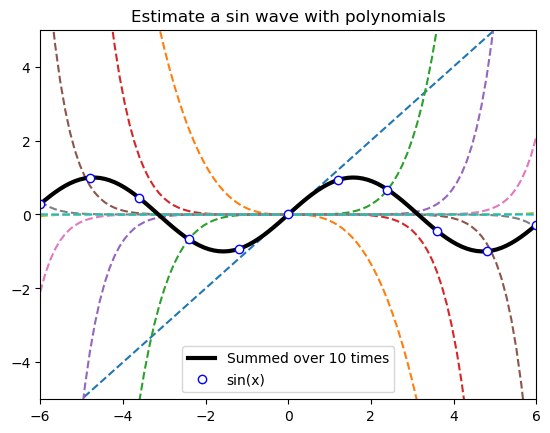

In [7]:
"""
Exercise 3: Define a sine wave with a polynomial. 
I.e., adding polynomials together will create a sine wave, specifically a ma. 
Will loop through a range and the order of the polynomial will change on each iteration. 
Each iteration will be plotted and added to a zeros space that is initialised for y. 
Then the max order polynomial will be plotted, and compared with numpy's sin function to show 
that adding multiple polynomials together in a maclaurin series will give the same result as sin. 
"""

# Set the max range in which the function will work up to. 
max_order = 10

# Create a domain for x 
x = np.linspace(-6,6,101)

# Initialise the space for y 
y = np.zeros(len(x))

# Loop over max_range and plot the formula 
for n in range(1,max_order+1):
    
    # Create the individual instances of the function 
    sign_a = (-1)**(n-1)
    num_b = x**(2*n-1)
    denom_c = np.math.factorial(2*n-1)
    
    function = sign_a * num_b/denom_c
    
    
    # Plot it 
    plt.plot(x,function,linestyle = '--')
    
    # Add the function to the space generated for y 
    y += function 
    
# Plot the 10th iteration of the function onto the graph     
plt.plot(x,y,'k',lw=3,label='Summed over 10 times')
plt.xlim([x[0],x[-1]])
plt.ylim([-5,5])

# Plot the sin of x onto the 10th iteration of the function 

sin_domain = np.linspace(-6,6,11) # Create a new domain with fewer values 
sin_y = np.sin(sin_domain) # Assign the sin to y 
plt.plot(sin_domain,sin_y,'bo',markerfacecolor='w',label='sin(x)') # Plot 

# Tidy the graph up 
plt.title("Estimate a sin wave with polynomials")
plt.legend()
plt.show()

## Code Challenge 3 - Exponential and Logarithm 
#### Exercise 1: Estimate e 
#### Exercise 2: Visualise how e changes as n approaches infinity
#### Exercise 3: Plotting various implementations of natural exponential in numpy

In [8]:
"""
Exercise 1: Estimate e.
Show that lim(1+1/n)^n will go towards e as n approaches infinity.
We can see from the output that the difference between the output of the formula, 
and the output of the numpy function reduces as the number n gets larger.
"""

# Define the values for n 
n_values = [1,2,5,10,100,1000,10000,1000000]

# Loop through the list and operate the formula 
for n in n_values:
    # Formula that will return an estimated value for e
    est_e = (1+(1/n))**n
    
    # Get the difference to e (est_e - numpy e function)
    e = np.exp(1) 
    e_diff = e - est_e
    
    # Print the required answer
    print(f"n: {n:2.0f}, est.e: {est_e:.5f}, diff to e: {e_diff:.5f}")

n:  1, est.e: 2.00000, diff to e: 0.71828
n:  2, est.e: 2.25000, diff to e: 0.46828
n:  5, est.e: 2.48832, diff to e: 0.22996
n: 10, est.e: 2.59374, diff to e: 0.12454
n: 100, est.e: 2.70481, diff to e: 0.01347
n: 1000, est.e: 2.71692, diff to e: 0.00136
n: 10000, est.e: 2.71815, diff to e: 0.00014
n: 1000000, est.e: 2.71828, diff to e: 0.00000


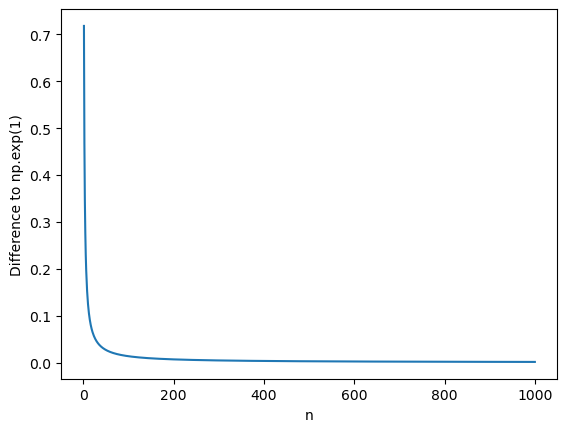

In [9]:
"""
Exercise 2: Visualise e's approach. 
Basically show a graphical representation of the table above. 
The function y, will be the difference between the formula for e: lim(1+1/n)^n and np.exp.
The graph will show that the difference drops off rapidly as n gets larger (approaches infinity). 
"""

# Define a domain for n 
n = np.linspace(1,1000,1001)

# Create the function 
numpy_e = np.exp(1) 
e_estimate = (1+(1/n))**n
function = numpy_e - e_estimate

# Plot 
plt.plot(n,function)
plt.xlabel('n')
plt.ylabel('Difference to np.exp(1)')
plt.show()

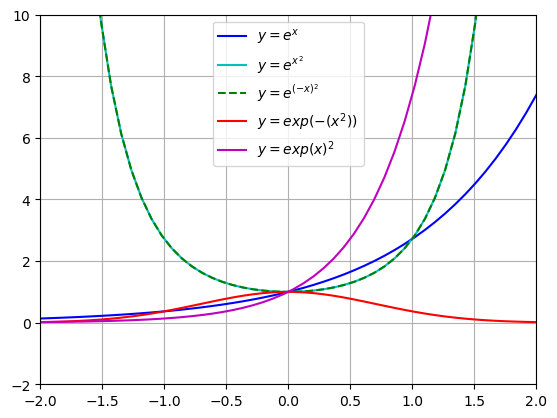

In [10]:
"""
Exercise 3: Exploring e function in numpy. 
Will plot various functions that are different implementations of the natural exponent
"""
# Define domain boundaries for x, create the space for x from that domain
xDomain = [-2,2]

x = np.linspace(xDomain[0],xDomain[-1])

# Create the individual functions 
y1 = np.exp(x)
y2 = np.exp(x**2)
y3 = np.exp((-x)**2)
y4 = np.exp(-(x**2))
y5 = np.exp(x)**2

# Plot the functions 
plt.plot(x,y1,'b',label='$y=e^x$')
plt.plot(x,y2,'c',label='$y=e^{x^2}$')
plt.plot(x,y3,'g--',label='$y=e^{(-x)^2}$')
plt.plot(x,y4,'r',label='$y=exp(-(x^2))$')
plt.plot(x,y5,'m',label='$y=exp(x)^2$')

# Tidy the graph 
plt.ylim(-2,10)
plt.xlim(xDomain[0],xDomain[-1])
plt.legend()
plt.grid()
plt.show()

/var/folders/l1/kb_t3jk17fn21h4x3hr3n3ch0000gn/T/ipykernel_2493/345731563.py:11: RuntimeWarning: invalid value encountered in log
  log_x = np.log(x)
/var/folders/l1/kb_t3jk17fn21h4x3hr3n3ch0000gn/T/ipykernel_2493/345731563.py:14: RuntimeWarning: invalid value encountered in log
  exp_log = np.exp(np.log(x))


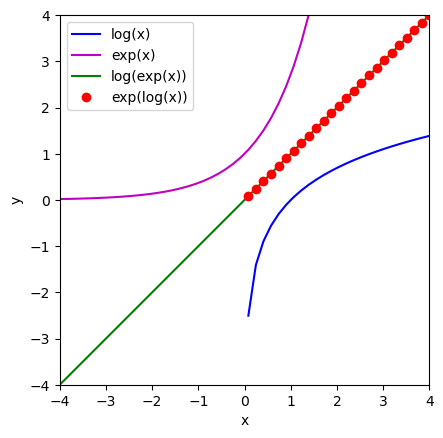

In [11]:
"""
Exercise 5: Demonstrate that exp and log are inverses of each other 
"""

# Define a domain for x, create the space for x from defined domain.
xDomain = [-4,4]

x = np.linspace(xDomain[0],xDomain[-1])

# Create functions to be plotted 
log_x = np.log(x)
exp_x = np.exp(x)
log_exp = np.log(np.exp(x))
exp_log = np.exp(np.log(x))

# Plot the functions 
plt.plot(x,log_x,'b',label='log(x)')
plt.plot(x,exp_x,'m',label='exp(x)')
plt.plot(x,log_exp,'g',label='log(exp(x))')
plt.plot(x,exp_log,'ro',label='exp(log(x))')

# Tidy the graph 
plt.axis('square')

plt.ylim(-4,4)
plt.xlim(xDomain[0],xDomain[1])

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()


## Code Challenge 4 - Trigonometry
#### Exercise 1 + Exercise 2 : Plotting various instances of sine  and cosine 



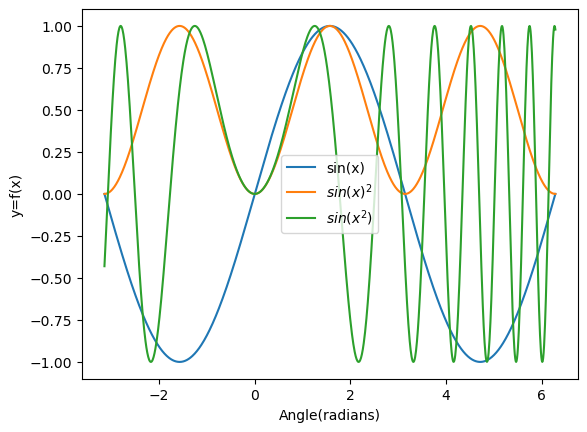

In [12]:
"""
Exercise 1: Plotting various outputs of sine 
"""

# Creating a domain for x 
xDomain = np.linspace(-np.pi,2*np.pi,1001)

# Creating the sin functions 
function1 = np.sin(xDomain)
function2 = np.sin(xDomain)**2
function3 = np.sin(xDomain**2) 

# Plotting 
plt.plot(xDomain,function1,label='sin(x)')
plt.plot(xDomain,function2,label='$sin(x)^2$')
plt.plot(xDomain,function3,label='$sin(x^2)$')

plt.xlabel('Angle(radians)')
plt.ylabel('y=f(x)')
plt.legend()
plt.show()


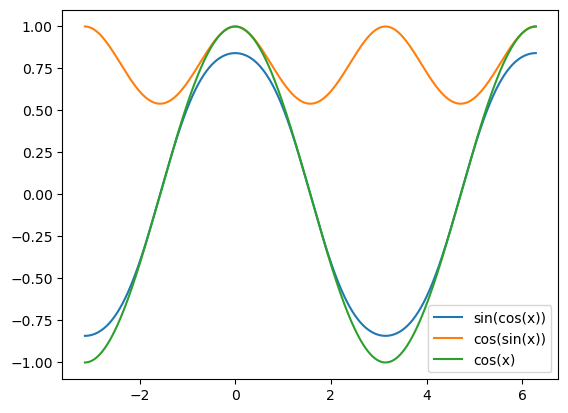

In [13]:
# Creating a domain for x 
xDomain = np.linspace(-np.pi,2*np.pi,1001)

# Creating a list object 
f = [0]*3

# Adding the function values to the list
f[0] = np.sin(np.cos(xDomain)), 'sin(cos(x))'
f[1] = np.cos(np.sin(xDomain)), 'cos(sin(x))'
f[2] = np.cos(xDomain), 'cos(x)'


for y,label in f:
    plt.plot(xDomain,y,label=label)
    
    
plt.legend()
plt.show()

## Code Challenge 5 - Piecewise Functions
#### Exercise 1: Implementing a Piecewise function using numpy and plotting it 
#### Exercise 2: Plotting each individual piece of a piecewise function
#### Exercise 3: Evaluating a function at or near a point


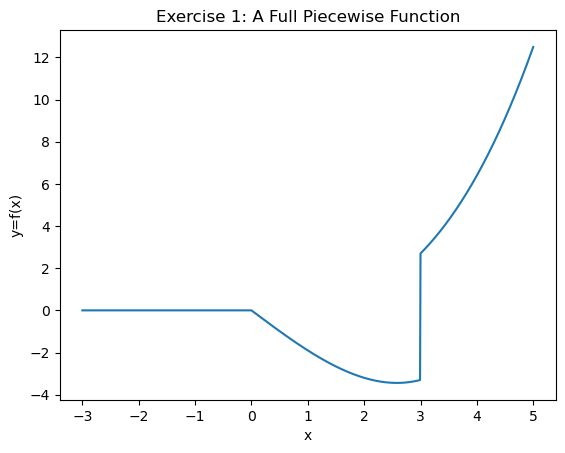

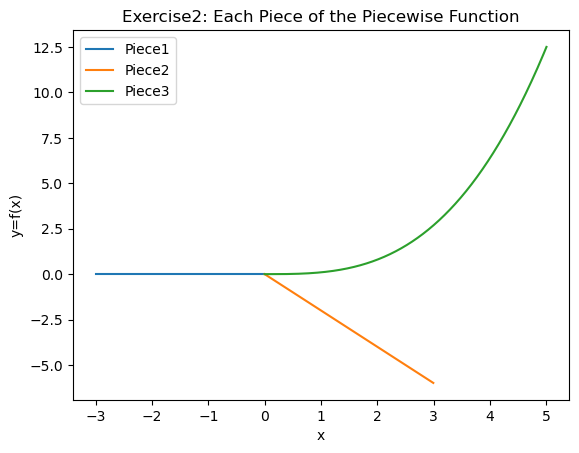

In [14]:
"""
Exercise 1: Implementing and plotting a piecewise function. 
Exercise 2: Implementing and plotting each individual part of a piecewise function
"""
# Define an x domain 
x = np.linspace(-3,5,1001)

# Define functions 
f = [0]*3 
f[0] = 0       * (x<0)
f[1] = -2*x    * ((x>=0)&(x<3))
f[2] = .1*x**3 * (x>=0)

y = sum(f)


# Plot for Exercise 1
plt.plot(x,y)
plt.title('Exercise 1: A Full Piecewise Function')
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.show()

# Plot for Exercise 2

# Define boolean conditionals to plot the specific piece in its required domain 
plt.plot(x[x<0],   np.zeros(len(x[x<0])),   label='Piece1') 
plt.plot(x[((x>=0)&(x<3))],   f[1][((x>=0)&(x<3))]    ,label='Piece2')
plt.plot(x[(x>=0)],   f[2][(x>=0)],   label='Piece3')

plt.title('Exercise2: Each Piece of the Piecewise Function')
plt.xlabel('x')
plt.ylabel('y=f(x)')
plt.legend()
plt.show()

In [15]:
"""
Exercise 3: Evaluating a function at or near a certain point. 
I.e., evaluating the function when x is a certain value.
There will be computer an innacuracy in numpy's calculation 
due to computer rounding error. 
"""

xDomain = np.linspace(-3,5,1001)
x_value = .5 

location = np.argmin((xDomain-x_value)**2)

print(f"Location in domain: {location}")
print(f"Value: {xDomain[location]}")

Location in domain: 437
Value: 0.496


## Code Challenge 6 - Discontinuities 
#### Exercise 1: Implementing a jump discontinuity using numpy 
#### Exercise 2: Removable discontinuity
#### Exercise 3: Oscilating discontinuity 

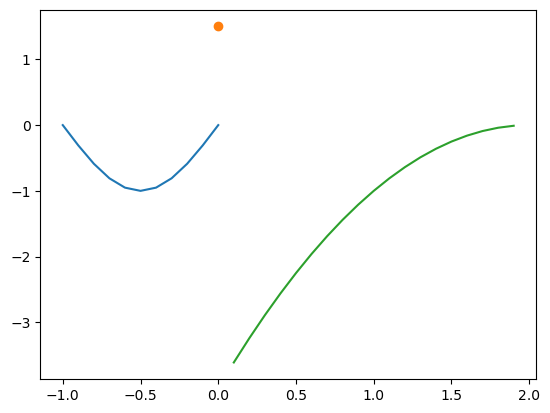

In [16]:
"""
Exercise 1: Implementing a jump discontinuity
"""

# Define a domain for x 
resolution = .1
x = np.arange(-1,2,resolution)

# Define the function 
f = [0]*3
f[0] = np.sin(x*np.pi)    *  (x < 0)
f[1] = 1.5*np.ones(len(x))  * (np.abs(x)<resolution/2)
f[2] = -(x-2)**2         * (x > 0)


# Plot the function 
plt.plot(x[(x < 0)],   f[0][(x < 0)])
plt.plot(x[(np.abs(x)<resolution/2)],   f[1][(np.abs(x)<resolution/2)],'o')
plt.plot(x[(x > 0)],   f[2][(x > 0)])



plt.show()


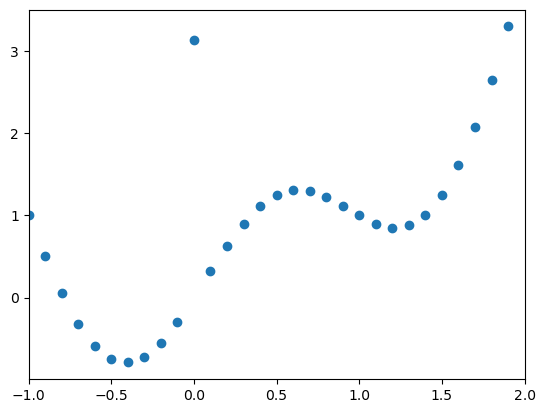

In [17]:
"""
Exercise 2: Removable discontinuity. 
Using the same x variable from Exercise 1 
"""

y = np.sin(x*np.pi)+x**2
y[np.argmin(np.abs(x-0))] = np.pi

plt.plot(x,y,'o')
plt.xlim(-1,2)
plt.show()



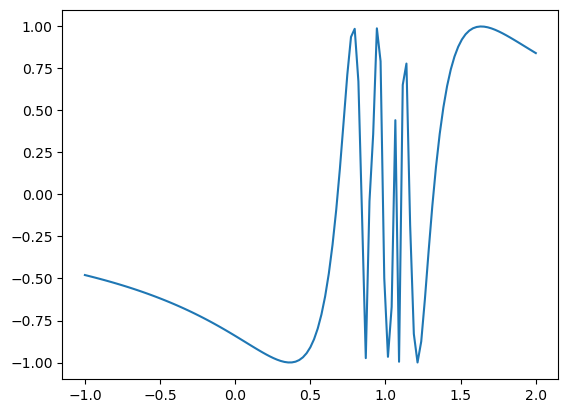

In [18]:
"""
Exercise 3: Oscilating Discontinuity.
Sin waves will oscilate as the function gets closer to 1. You can manipulate the domain for x to see this
"""

# Domain for x 
xx = np.linspace(-1,2,123)

# Function 
fx = np.sin(1/(xx-1))

# Plot 
plt.plot(xx,fx)
plt.show()

## Code Challenge 7 - Composite and Inverse Functions
#### Exercise 1 a + b: Create python functions to compute two composite functions 
#### Exercise 2: Inverse functions in numpy - demonstrate that the natural logarithm and exponent are inverses of each other 

In [19]:
"""
Exercise 1a: Create python functions to create mathematical functions. 
Use them to create composite functions 
"""

# Create the two functions 
def fx(x):
    return 2*x**2- 4 
    
def gx(x):
    return 7*np.abs(x) + 3 


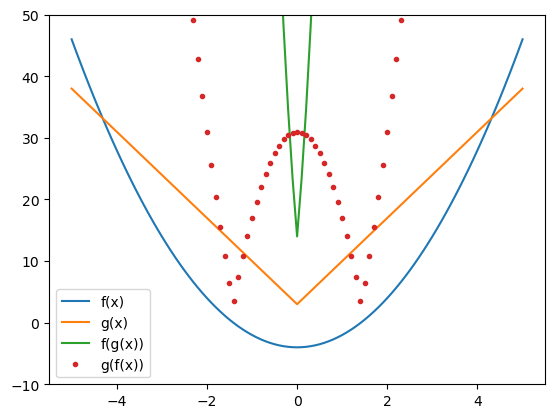

In [20]:
# Call the functions 
x = np.linspace(-5,5,101)

# Plot the basic functions 
plt.plot(x,fx(x), label = 'f(x)')
plt.plot(x,gx(x), label = 'g(x)')

# Plot composite functions
plt.plot(x,fx(gx(x)), label = 'f(g(x))')
plt.plot(x,gx(fx(x)), '.', label = 'g(f(x))')

# Plot two axis lines 


# Tidy up the graph 
plt.ylim(-10,50)
plt.legend()
plt.show()

In [21]:
"""
Exercise 1b: Create python functions to create mathematical functions. 
Use them to create composite functions 
"""

def fxb(x):
    return np.sin(x) 

def gxb(x):
    return np.log(x) 

def hxb(x):
    return 2*x**2 + 5 


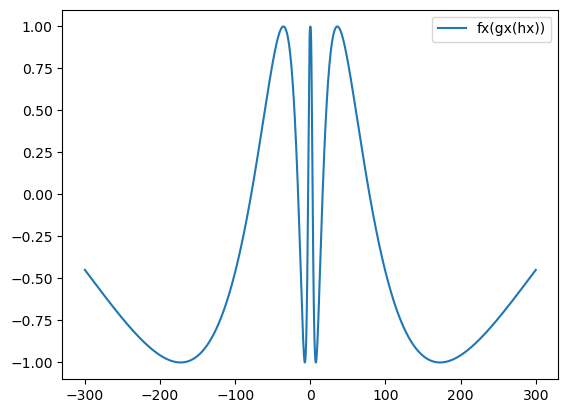

In [22]:
# Domain for x 
x = np.linspace(-300,300,3001) 

# Concatenate function 
function = fxb(gxb(hxb(x)))

# Plot 
plt.plot(x,function,label='fx(gx(hx))')
plt.legend()
plt.show()


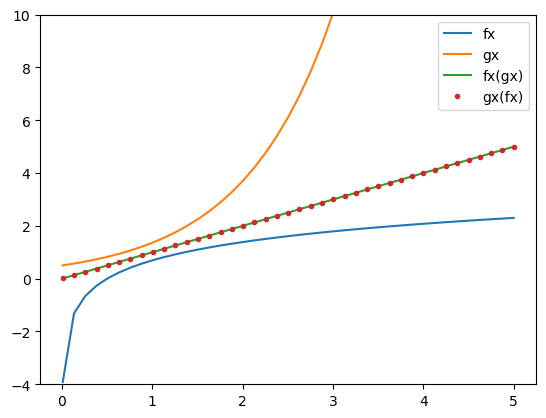

In [23]:
"""
Exercise 2: Inverse functions in numpy.
Demonstrate that the natural logarithm and exponent are inverses of each other. 
This will be done through composing the two functions. 
The composition should return the unity line, i.e., y = x 
"""

# Domain for x 
x = np.linspace(.01,5,41)

# Base Functions 
fx = lambda x: np.log(2*x) 
gx = lambda x: np.exp(x)/2 

# Composite Functions 
fxg_comp = fx(gx(x))
gxf_comp = gx(fx(x))

# Plot
plt.plot(x,fx(x), label = 'fx')
plt.plot(x,gx(x), label = 'gx')
plt.plot(x,fxg_comp, label = 'fx(gx)')
plt.plot(x,gxf_comp,'.', label = 'gx(fx)')

# Tidy up plot 
plt.ylim(-4,10)
plt.legend()
plt.show()
